In [ ]:
# FATHIMA IRFANA N Pf
# ROLL NO :30
#Aim:
# Q)Write a Python Program to detect Diabetes using a Multi-layer Perceptron(MLP) model.Use the given dayaset diabetes.csv which contains various medical predictor variables and one target variable indicating whether the patient has diabetes or not.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier


In [ ]:
df = pd.read_csv('diabetes.csv')
print(df.shape)
df.describe().transpose()

(768, 9)


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


In [ ]:
y=df['Outcome']
print (y)
df=df.drop(['Outcome'], axis=1)
x= df
print(x)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70      

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42) # Added random_state for reproducibility
print(x_train.shape); print(x_test.shape)

(537, 8)
(231, 8)


In [ ]:
from sklearn.preprocessing import MinMaxScaler
st_x= MinMaxScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)
print(x_train)

[[0.05882353 0.47738693 0.49180328 ... 0.3561848  0.07771136 0.01666667]
 [0.29411765 0.52763819 0.59016393 ... 0.54992548 0.03458582 0.11666667]
 [0.         0.67839196 0.55737705 ... 0.63040238 0.12254483 0.05      ]
 ...
 [0.58823529 0.50753769 0.70491803 ... 0.67958271 0.45175064 0.28333333]
 [0.         0.70854271 0.         ... 0.6318927  0.05422716 0.13333333]
 [0.         0.6281407  0.78688525 ... 0.33532042 0.07856533 0.        ]]


In [ ]:
classifier = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
classifier.fit(x_train, y_train)

x_pred = classifier.predict(x_train)
y_pred = classifier.predict(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print (y_test.values)
print (y_pred)

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1
 0 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0
 0 0 0 0 1 1 0 0 0]
[0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 1
 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0
 0 0 0 1 1 0 0 0 0]


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print (cm)

[[122  29]
 [ 25  55]]


In [ ]:
from sklearn.metrics import confusion_matrix
cm1= confusion_matrix(y_train, x_pred)
print(cm1)

[[311  38]
 [ 70 118]]


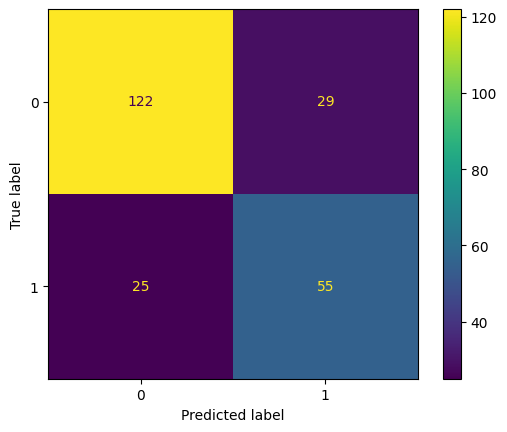

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay (confusion_matrix=cm,
display_labels=classifier.classes_)
disp.plot()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score (y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred, pos_label=0)))
print('Recall score: {}'.format(recall_score(y_test, y_pred, pos_label=0)))
print('F1 score: {}'.format(f1_score(y_test, y_pred, pos_label=0)))

Accuracy score: 0.7662337662337663
Precision score: 0.8299319727891157
Recall score: 0.8079470198675497
F1 score: 0.8187919463087249


In [ ]:
classifier.coefs_

[array([[ 0.07232642,  0.23772899,  0.28091014,  0.89558519, -0.05633837,
         -0.08897184,  0.04515745,  0.36660326],
        [-0.33662347, -0.14883726,  0.72177165, -0.14022985,  0.47710571,
          0.0951686 , -0.23454288, -0.49495348],
        [ 0.58669384, -0.06866186,  0.3085715 , -0.32329321,  0.24068497,
          0.56264458,  0.02697419,  0.64837617],
        [-0.2061214 ,  0.91746932,  0.20242867,  0.43992959, -0.23616456,
          0.20149945, -0.07922417, -0.14510632],
        [ 0.18297469,  0.45382231,  0.19015387,  0.52175194,  0.07411435,
          0.35691063, -0.17111772,  0.48123387],
        [ 0.67164901,  0.43492328, -0.14826295,  0.253562  ,  0.8929466 ,
         -0.54042049, -0.10731344, -0.26874995],
        [-0.64287905, -1.04674667,  0.09026173,  0.11171889,  0.27168285,
          0.69005971, -0.22987843,  0.12764562],
        [-0.35128984,  0.19571644,  0.26599908, -0.27468662,  0.57755718,
          0.0539908 ,  1.05362002, -0.03706045]]),
 array([[-8.31

In [ ]:
classifier.intercepts_

[array([-0.52934484,  0.58426651, -0.5668616 , -0.32006437, -0.49117137,
         0.1792466 , -0.20813042,  0.46023062]),
 array([ 0.17283786,  0.64679836,  0.49058163, -0.12508037, -0.27996388,
        -0.27307409,  0.39361754,  0.53230021]),
 array([-0.17714811, -0.38642228, -0.10383349, -0.12490204,  0.30323056,
         0.00469465, -0.59973461, -0.58390894]),
 array([-1.41508047])]